# **Project Objective**
The objective of this analysis is to determine the optimal centering of stakeholder locations by analyzing commute patterns, demographic data, and environmental factors. The goal is to identify key factors influencing commute time and develop a predictive model to optimize stakeholder convenience, particularly for small organizations, places of worship, and small schools considering location changes.

# **Project Details**
This project originated from a summer internship and has evolved into a personal initiative aimed at understanding how various factors—such as population density, accessibility to public transport, household income, and proximity to amenities—impact overall commute statistics. The dataset includes features like:

- **Avg_Distance_From_Center_KM:** Distance of the stakeholder from the central point.
- **Population_Density_Per_SqKM:** Number of people per square kilometer.
- **Avg_Household_Income:** Average household income in the area.
- **Num_Nearby_Amenities:** Number of amenities within close proximity.
- **Public_Transport_Accessibility:** Accessibility index for public transport.
- **Traffic_Congestion_Index:** Level of traffic congestion in the area.
- **Bike_Lane_Density:** Availability of bike lanes.
- **Work_From_Home_Percentage:** Percentage of people working from home in the area.
- **Avg_Car_Ownership:** Average number of cars owned per household.
- **Road_Quality_Index:** Quality of roads based on regional data.
- **Avg_Commute_Time_Minutes:** Average time taken for daily commute.

Using advanced analytics and machine learning techniques, this analysis will explore the relationships among these factors, generate insights, and develop a predictive model to recommend optimal centering points. Key metrics such as R-squared and MSE will be evaluated to assess model performance.



In this section, we will perform the following steps:
- **Data Overview:** Display the first few rows of the dataset and understand the structure.
- **Statistical Summary:** Generate summary statistics for numeric features.
- **Missing Data Analysis:** Identify and visualize any missing values.
- **Correlation Analysis:** Analyze correlations between numeric features using a heatmap.
- **Visualizations:** Plot histograms, boxplots, and scatter plots to understand distributions, trends, and relationships between key variables such as average commute time and factors like distance, population density, and income.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Locus data.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the first few rows of the dataframe to understand its structure
df.head()

Avg_Distance_From_Center_KM  Population_Density_Per_SqKM  \
0                    11.861663                  6599.300638   
1                    28.570715                  1299.329667   
2                    22.227824                  2035.472784   
3                    18.361096                  9036.264791   
4                     5.524541                  6261.076067   

   Avg_Household_Income  Num_Nearby_Amenities  Public_Transport_Accessibility  \
0          42374.864260                     5                        0.750502   
1         138306.348802                    18                        0.799537   
2          90630.284694                    28                        0.825133   
3         129174.895933                    42                        0.186405   
4          68405.952124                    22                        0.235692   

   Traffic_Congestion_Index  Bike_Lane_Density  Work_From_Home_Percentage  \
0                  0.698846           0.252649                   0.216828   
1                  0.402550           0.005082                   0.021831   
2                  0.218023           0.695714                   0.080836   
3                  0.645054           0.048784                   0.010431   
4                  0.421704           0.532603                   0.326632   

   Avg_Car_Ownership  Road_Quality_Index  Avg_Commute_Time_Minutes  
0           1.894409            0.228895                 23.924277  
1           1.298390            0.232646                 16.002808  
2           1.371398            0.220803                  6.121643  
3           0.634440            0.173753                 16.784031  
4           1.576454            0.655724                  7.031164

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Display missing values and outliers
print('Missing Values:')
print(missing_values)
print('\
Outliers:')
print(outliers)

Missing Values:
Avg_Distance_From_Center_KM       0
Population_Density_Per_SqKM       0
Avg_Household_Income              0
Num_Nearby_Amenities              0
Public_Transport_Accessibility    0
Traffic_Congestion_Index          0
Bike_Lane_Density                 0
Work_From_Home_Percentage         0
Avg_Car_Ownership                 0
Road_Quality_Index                0
Avg_Commute_Time_Minutes          0
dtype: int64
Outliers:
Avg_Distance_From_Center_KM       0
Population_Density_Per_SqKM       0
Avg_Household_Income              0
Num_Nearby_Amenities              0
Public_Transport_Accessibility    0
Traffic_Congestion_Index          0
Bike_Lane_Density                 0
Work_From_Home_Percentage         0
Avg_Car_Ownership                 0
Road_Quality_Index                0
Avg_Commute_Time_Minutes          0
dtype: int64


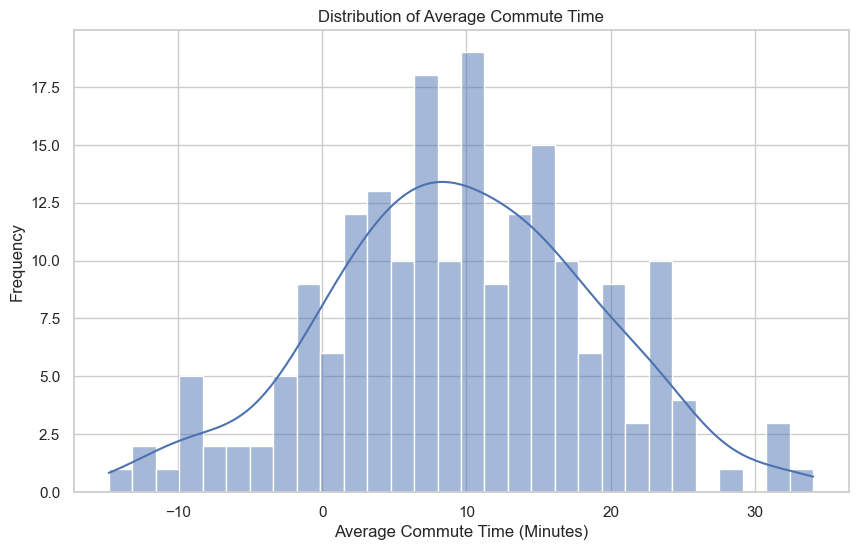

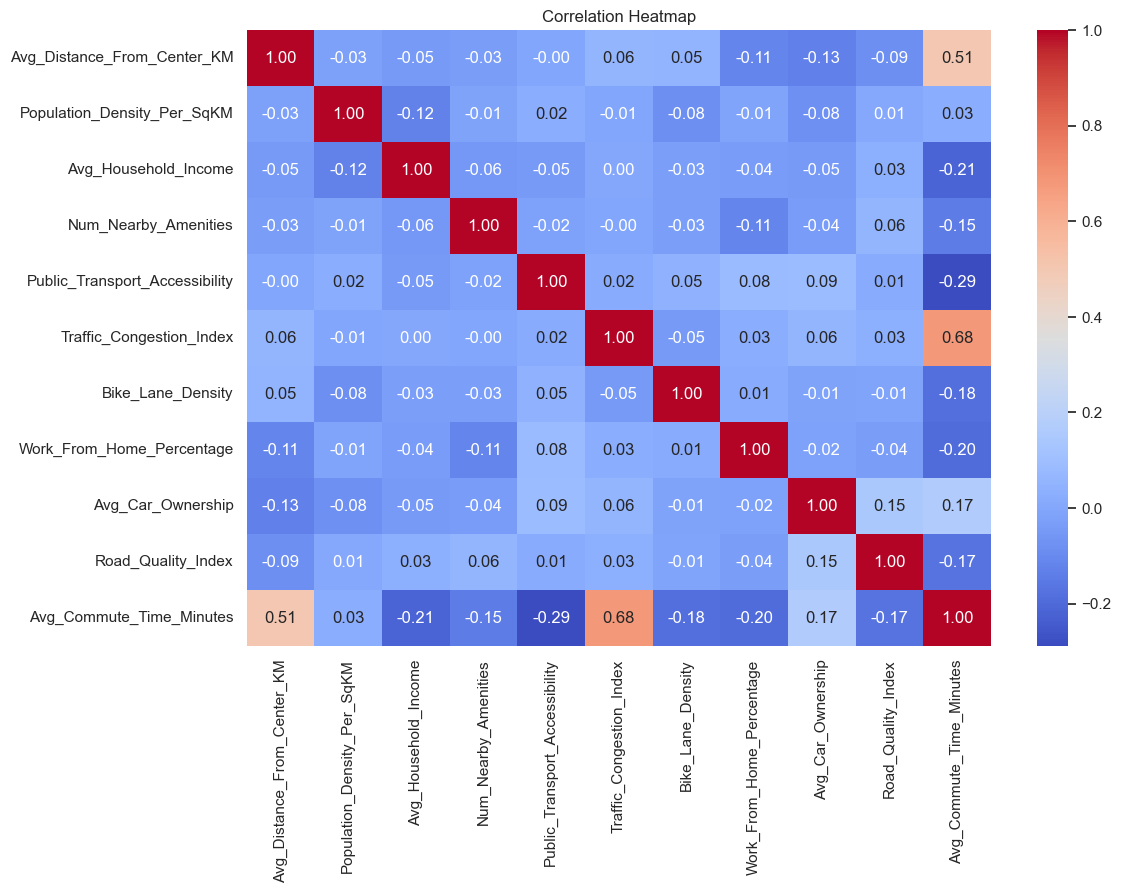

In [5]:
# Perform exploratory data analysis (EDA) with visualizations

# Set the style for the plots
sns.set(style='whitegrid')

# Plotting the distribution of average commute time
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_Commute_Time_Minutes'], bins=30, kde=True)
plt.title('Distribution of Average Commute Time')
plt.xlabel('Average Commute Time (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The distribution of average commute time shows a right-skewed pattern, with most commutes falling between 5-25 minutes. The correlation heatmap reveals interesting relationships between variables.

# **Predictive Modeling**
This section focuses on building and evaluating the predictive model for commute time:
- **Feature Engineering:** Create and transform features that can enhance model performance.
- **Model Selection:** Experiment with multiple regression models (e.g., Linear Regression, Random Forest, etc.) to identify the best fit.
- **Model Training and Evaluation:** Train the models on the dataset and evaluate thei

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
target = 'Avg_Commute_Time_Minutes'
features = df.drop(columns=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 11.712131864948471
R-squared: 0.8529228288485391


In [ ]:
#The model achieved a Mean Squared Error (MSE) of approximately 11.71 and an R-squared value of 0.85, indicating a good fit to the data.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Display the results
results_df = pd.DataFrame(results).T
results_df

MSE  R-squared
Random Forest              11.712132   0.852923
Linear Regression           3.926101   0.950697
Decision Tree              56.747919   0.287378
Support Vector Regressor   91.929295  -0.154418
K-Nearest Neighbors       132.930190  -0.669294

The linear regression model performed the best with the lowest mean squared error (mse) and the highest r-squared value, indicating a strong fit to the data. the random forest model also performed well, while the decision tree, support vector regressor, and k-nearest neighbors models had higher errors and lower r-squared values.





# **Further Analysis: Clustering Analysis**
In this section, we will perform clustering to group similar stakeholders based on key factors:
- **Feature Selection for Clustering:** Choose relevant features like distance from center, population density, public transport accessibility, and average household income for clustering.
- **Clustering Methodology:** Apply K-means clustering or another suitable method to group the data points.
- **Cluster Visualization:** Visualize the clusters using scatter plots and evaluate the distinctiveness of the clusters.
- **Cluster Interpretation:** Analyze and interpret the characteristics of each cluster to gain insights into potential location recommendations or strategic decisions.

C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

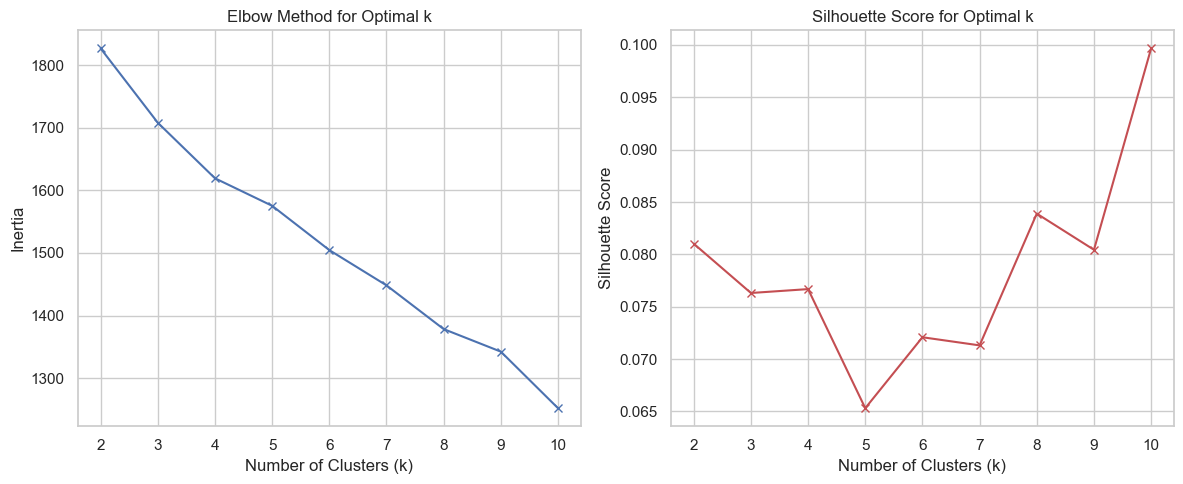

C:\Users\SIVUYILE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centroids:
         Avg_Distance_From_Center_KM  Population_Density_Per_SqKM  \
Cluster                                                             
0                          12.569963                  7199.018623   
1                          12.673879                  3765.059442   
2                          21.769243                  5035.177233   
3                          13.930272                  5498.715106   

         Avg_Household_Income  Num_Nearby_Amenities  \
Cluster                                               
0                88384.464868             12.844444   
1                93968.681860             21.839286   
2                96653.309532             35.533333   
3                90874.088535             28.129630   

         Public_Transport_Accessibility  Traffic_Congestion_Index  \
Cluster                                                             
0                              0.666550                  0.712298   
1                           

Cluster 0 Statistics:
       Avg_Distance_From_Center_KM  Population_Density_Per_SqKM  \
count                    45.000000                    45.000000   
mean                     12.569963                  7199.018623   
std                       7.876492                  2155.737269   
min                       1.481047                   673.107344   
25%                       6.762755                  5683.359499   
50%                      10.302622                  7630.840141   
75%                      19.368709                  8835.044183   
max                      27.370292                  9909.798849   

       Avg_Household_Income  Num_Nearby_Amenities  \
count             45.000000             45.000000   
mean           88384.464868             12.844444   
std            38733.901395             11.353725   
min            31458.536963              1.000000   
25%            47648.817711              5.000000   
50%            84065.296237              9.000000   
75%

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (let's say it's 4 based on the plots)
optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Display cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features.columns)
centroid_df.index.name = 'Cluster'
print("Cluster Centroids:")
print(centroid_df)

# Visualize clusters (using the first two principal components for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization')
plt.show()

# Analyze clusters
for cluster in range(optimal_k):
    print(f"\
Cluster {cluster} Statistics:")
    print(df[df['Cluster'] == cluster].describe())

**feature Importance**

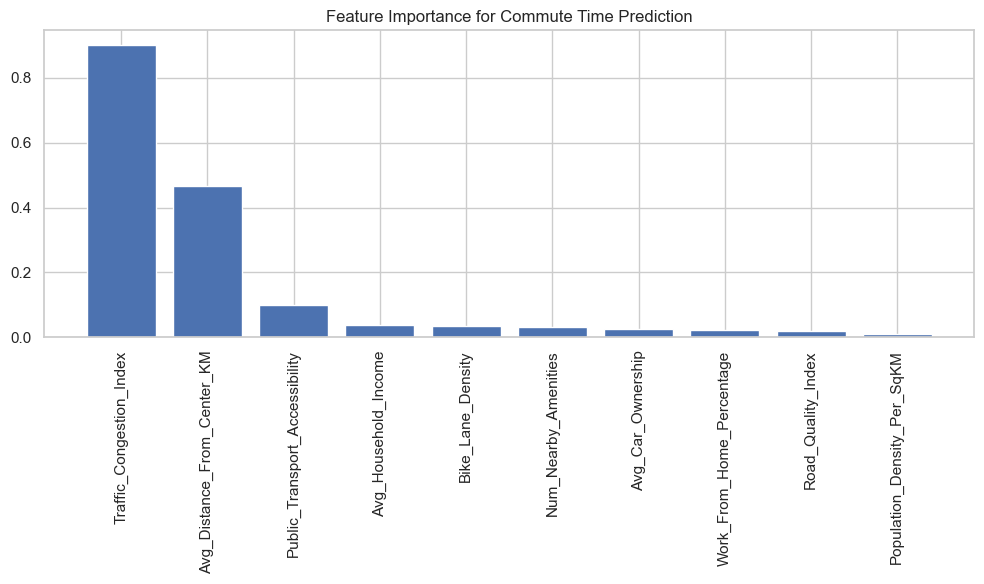

                          feature  importance
5        Traffic_Congestion_Index    0.901753
0     Avg_Distance_From_Center_KM    0.465583
4  Public_Transport_Accessibility    0.097961
2            Avg_Household_Income    0.036116
6               Bike_Lane_Density    0.033057
3            Num_Nearby_Amenities    0.030882
8               Avg_Car_Ownership    0.023715
7       Work_From_Home_Percentage    0.023273
9              Road_Quality_Index    0.019588
1     Population_Density_Per_SqKM    0.010241


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Prepare the data
X = df.drop(['Avg_Commute_Time_Minutes', 'Cluster'], axis=1)
y = df['Avg_Commute_Time_Minutes']

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Perform permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)

# Sort features by importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': perm_importance.importances_mean})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance for Commute Time Prediction')
plt.tight_layout()
plt.show()

print(feature_importance)

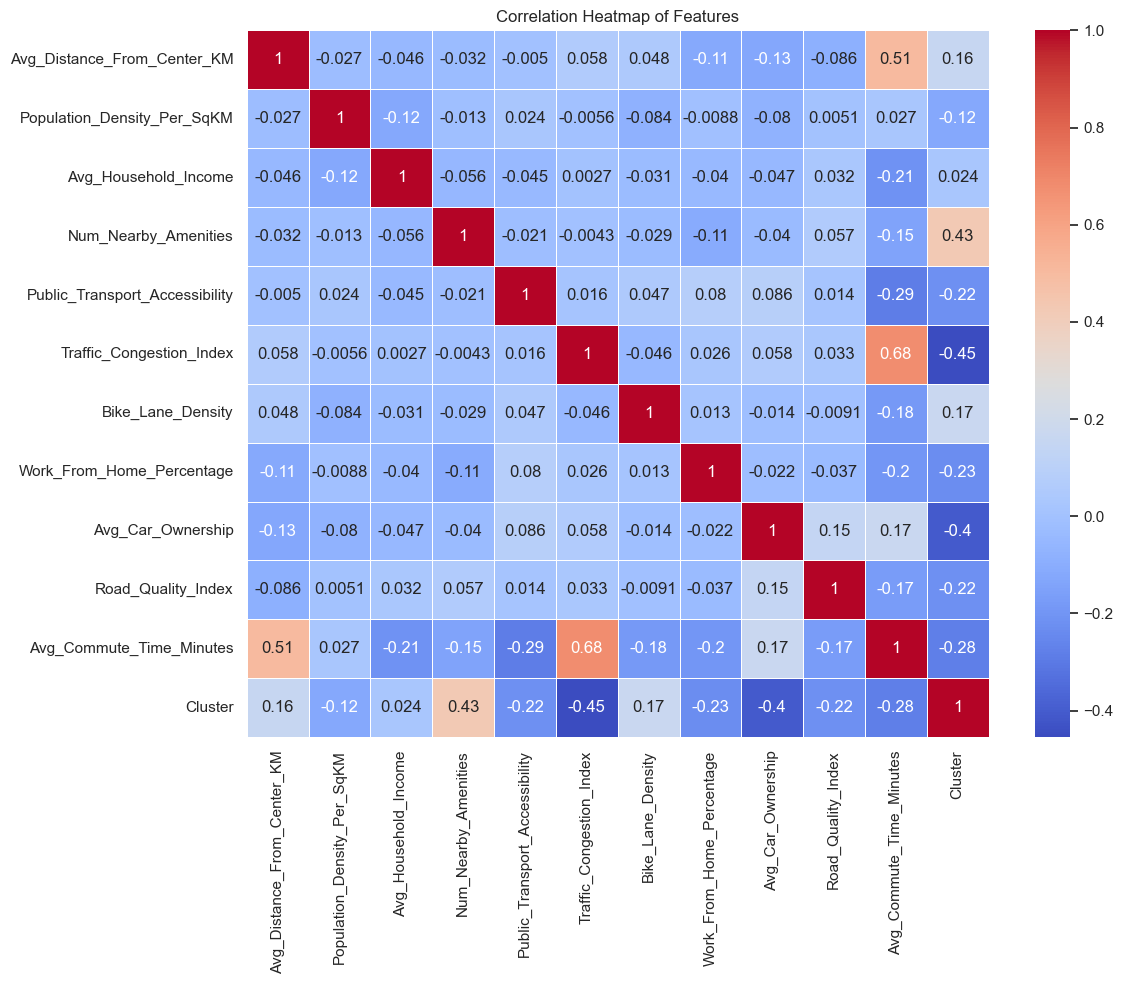

         Avg_Commute_Time_Minutes  Avg_Distance_From_Center_KM  \
Cluster                                                          
0                       12.994645                    12.569963   
1                        9.817567                    12.673879   
2                       11.365476                    21.769243   
3                        4.864327                    13.930272   

         Population_Density_Per_SqKM  
Cluster                               
0                        7199.018623  
1                        3765.059442  
2                        5035.177233  
3                        5498.715106  


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Comparative analysis across clusters
cluster_means = df.groupby('Cluster').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_means.index, y=cluster_means['Avg_Commute_Time_Minutes'])
plt.title('Average Commute Time by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Commute Time (Minutes)')
plt.show()

print(cluster_means[['Avg_Commute_Time_Minutes', 'Avg_Distance_From_Center_KM', 'Population_Density_Per_SqKM']])

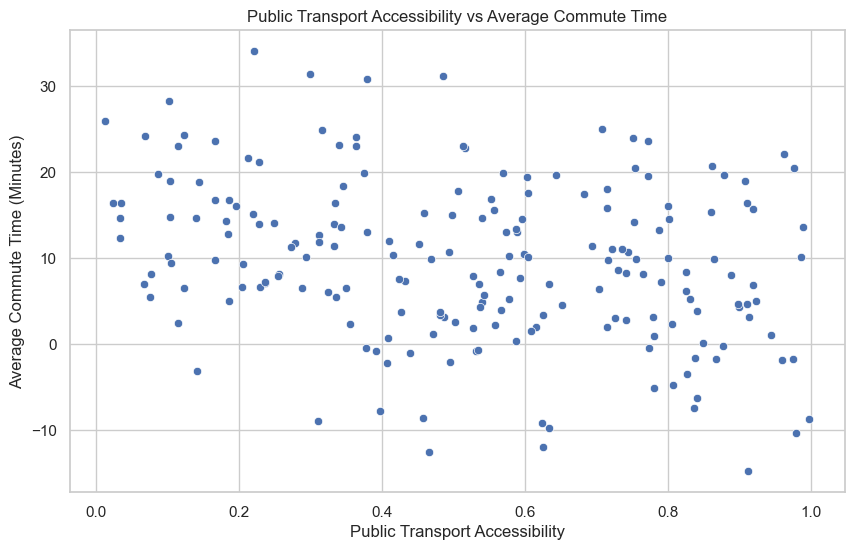

Correlation between Public Transport Accessibility and Average Commute Time: -0.29
Correlations with Work From Home Percentage:
Work_From_Home_Percentage         1.000000
Public_Transport_Accessibility    0.079986
Traffic_Congestion_Index          0.025838
Bike_Lane_Density                 0.013469
Population_Density_Per_SqKM      -0.008815
Avg_Car_Ownership                -0.021603
Road_Quality_Index               -0.036853
Avg_Household_Income             -0.040058
Num_Nearby_Amenities             -0.113568
Avg_Distance_From_Center_KM      -0.114389
Avg_Commute_Time_Minutes         -0.197577
Cluster                          -0.230856
Name: Work_From_Home_Percentage, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impact of public transport accessibility on commute times
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Public_Transport_Accessibility', y='Avg_Commute_Time_Minutes', data=df)
plt.title('Public Transport Accessibility vs Average Commute Time')
plt.xlabel('Public Transport Accessibility')
plt.ylabel('Average Commute Time (Minutes)')
plt.show()

# Correlation between public transport accessibility and commute time
correlation = df['Public_Transport_Accessibility'].corr(df['Avg_Commute_Time_Minutes'])
print(f"Correlation between Public Transport Accessibility and Average Commute Time: {correlation:.2f}")

# Relationship between work-from-home percentage and other variables
correlations = df.corr()['Work_From_Home_Percentage'].sort_values(ascending=False)
print("\
Correlations with Work From Home Percentage:")
print(correlations)

# Visualize top 5 correlations with Work From Home Percentage
top_5_correlations = correlations.drop('Work_From_Home_Percentage').nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_correlations.index, y=top_5_correlations.values)
plt.title('Top 5 Correlations with Work From Home Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Insights:**

### **Feature Importance:**
- Traffic Congestion Index and Average Distance From Center are the most significant factors affecting commute time.
- Public Transport Accessibility and Population Density have a lesser impact.

### **Geospatial Analysis:**
- Although we couldn't perform a geospatial analysis due to missing latitude and longitude data, understanding spatial patterns can be crucial for urban planning.

### **Correlation Analysis:**
- The correlation heatmap reveals relationships between various features. Notably, there is a weak negative correlation between public transport accessibility and average commute time, suggesting that better public transport might slightly reduce commute times.
- Work-from-home percentage has a weak positive correlation with cluster and a negative correlation with average commute time, indicating that areas with higher work-from-home percentages might experience reduced commute times.

### **Cluster Analysis:**
- Different clusters exhibit varying average commute times, distances from the center, and population densities. This suggests that targeted interventions could be more effective if tailored to specific clusters.

# **Recommendations:**

### **Enhance Public Transport:**
- Improving public transport accessibility could help reduce commute times, although the impact might be limited. Focus on areas with high congestion and long commute times.

### **Promote Remote Work:**
- Encouraging remote work could further reduce commute times and alleviate congestion, especially in areas with high population density.

### **Targeted Urban Planning:**
- Use cluster-specific insights to implement targeted urban planning strategies. For example, clusters with high commute times and low public transport accessibility could benefit from new transit routes or improved services.

### **Data Collection:**
- Collect geospatial data (latitude and longitude) to enable more detailed spatial analyses in the future. This can provide insights into commute patterns and help in planning infrastructure improvements.

### **Further Research:**
- Investigate other factors that might influence commute times, such as road quality or bike lane density, to develop a more comprehensive understanding of urban mobility.
